# Choosing Classifiers for Causal Inference

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import warnings
import os

warnings.filterwarnings('ignore')

def set_plot_style():
    plt.style.use('ggplot')
    plt.rcParams['font.size'] = 14
    plt.rcParams['axes.labelsize'] = 16
    plt.rcParams['axes.titlesize'] = 18
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['legend.fontsize'] = 12
    plt.rcParams['figure.titlesize'] = 20

# if the dir '/Users/gurkeinan/semester6/Causal-Inference/Project/report/plots/' does not exist, create it
if not os.path.exists('/Users/gurkeinan/semester6/Causal-Inference/Project/report/plots/'):
    os.makedirs('/Users/gurkeinan/semester6/Causal-Inference/Project/report/plots/')

DATA_PATH = '/Users/gurkeinan/semester6/Causal-Inference/Project/code/data/processed_data.csv'
Y_GIVEN_XT_ROC_PATH = '/Users/gurkeinan/semester6/Causal-Inference/Project/report/plots/roc_curve_y_given_xt.png'
T_GIVEN_X_ROC_PATH = '/Users/gurkeinan/semester6/Causal-Inference/Project/report/plots/roc_curve_t_given_x.png'
Y_GIVEN_XT_FEATURE_IMPORTANCE_PATH = '/Users/gurkeinan/semester6/Causal-Inference/Project/report/plots/feature_importance_y_given_xt.png'
T_GIVEN_X_FEATURE_IMPORTANCE_PATH = '/Users/gurkeinan/semester6/Causal-Inference/Project/report/plots/feature_importance_t_given_x.png'

In [2]:
X, t, y = read_and_transform_data(DATA_PATH)
Xt = pd.concat([X, t], axis=1)


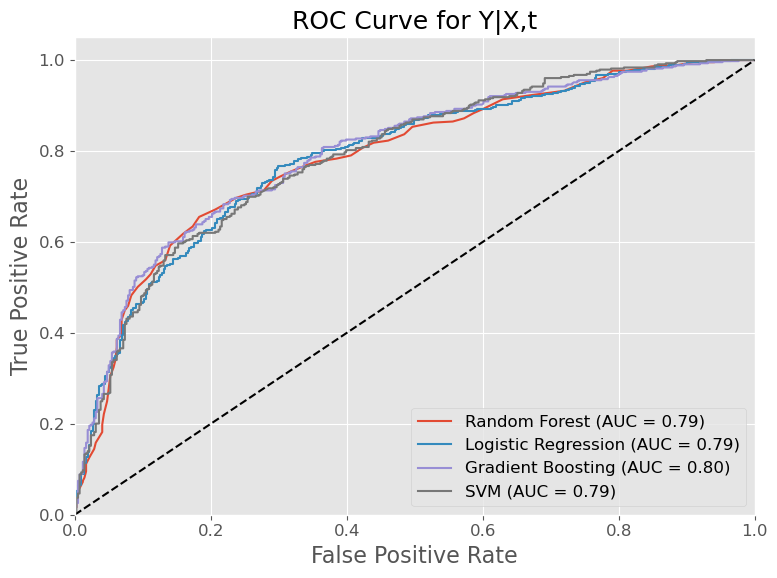

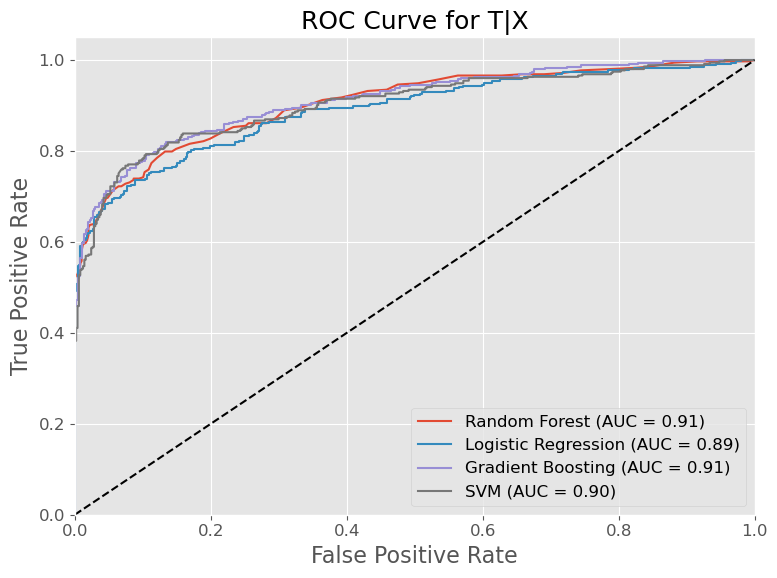

In [3]:
def plot_roc_curve(X, y, title, save_path):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'SVM': SVC(probability=True, random_state=42)
    }

    plt.figure(figsize=(8, 6))

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

# Set the plot style
set_plot_style()

# Plot ROC curve for Y|X,t
plot_roc_curve(Xt, y, 'ROC Curve for Y|X,t', Y_GIVEN_XT_ROC_PATH)

# Plot ROC curve for T|X
plot_roc_curve(X, t, 'ROC Curve for T|X', T_GIVEN_X_ROC_PATH)

# Feature Importance

Scholarship holder_1                                      0.277378
Adult                                                     0.101654
Course_9500                                               0.090418
Gender_1                                                  0.064034
Admission grade                                           0.062827
Previous qualification (grade)                            0.062534
Course_9119                                               0.053377
Unemployment rate                                         0.036375
Course_9853                                               0.030273
GDP                                                       0.023130
Course_9238                                               0.020907
Course_8014                                               0.019552
Inflation rate                                            0.018176
Course_9147                                               0.010963
Father's occupation_Other                                 0.00

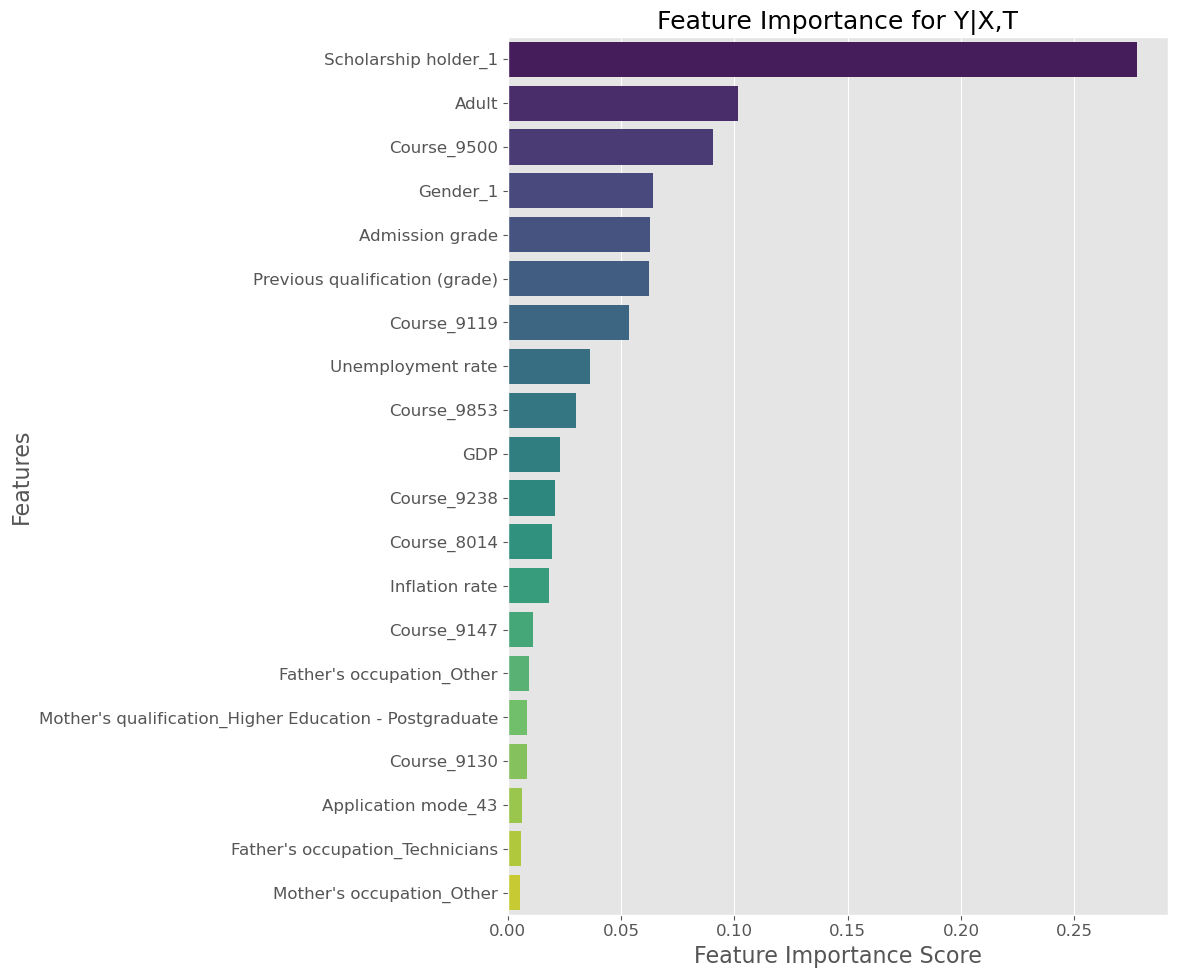

Daytime/evening attendance_1                            0.205711
Previous qualification_Complete Secondary Education     0.187953
Application order_1                                     0.082557
Marital status_2                                        0.082543
Admission grade                                         0.076042
Previous qualification (grade)                          0.072460
Displaced_1                                             0.039177
Application mode_17                                     0.035387
Application mode_44                                     0.029906
Application mode_43                                     0.028226
Course_9003                                             0.025633
Scholarship holder_1                                    0.021023
Gender_1                                                0.018783
Marital status_4                                        0.011300
GDP                                                     0.009131
Application mode_42      

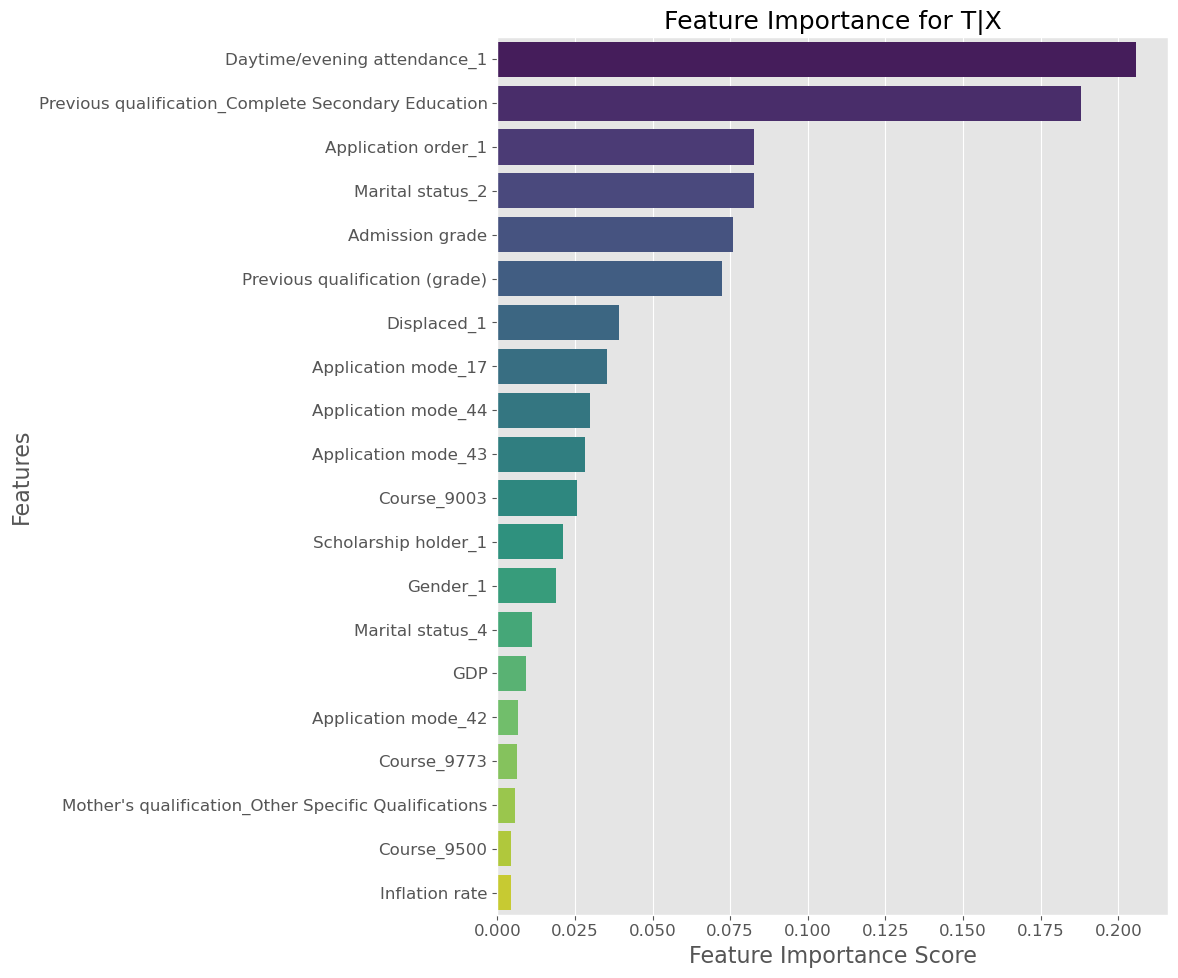

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

def set_plot_style():
    plt.style.use('ggplot')
    plt.rcParams['font.size'] = 14
    plt.rcParams['axes.labelsize'] = 16
    plt.rcParams['axes.titlesize'] = 18
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['legend.fontsize'] = 12
    plt.rcParams['figure.titlesize'] = 20

def plot_feature_importance(X, y, title, save_path, num_features=20):
    model = GradientBoostingClassifier(random_state=42)
    model.fit(X, y)

    feature_scores = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    features_to_plot = feature_scores[:num_features]

    # print the feature importance scores
    print(features_to_plot)

    plt.figure(figsize=(12, 10))
    ax = sns.barplot(x=features_to_plot.values, y=features_to_plot.index, palette='viridis')
    ax.set_title(title)
    ax.set_xlabel("Feature Importance Score")
    ax.set_ylabel("Features")

    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

# Set the plot style
set_plot_style()

# Plot feature importance for Y|X,T
plot_feature_importance(Xt, y, "Feature Importance for Y|X,T", Y_GIVEN_XT_FEATURE_IMPORTANCE_PATH)

# Plot feature importance for T|X
plot_feature_importance(X, t, "Feature Importance for T|X", T_GIVEN_X_FEATURE_IMPORTANCE_PATH)